In [27]:
#test
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12.10 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.10"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.10"):
    print(FAIL, "Python version 3.12.10 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "2.2.5", 'matplotlib': "3.10.1",'sklearn': "1.6.1", 
                'pandas': "2.2.3",'xgboost': "3.0.0", 'shap': "0.47.2", 
                'polars': "1.27.1", 'seaborn': "0.13.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.10

[ OK ] numpy version 2.2.5 is installed.
[ OK ] matplotlib version 3.10.1 is installed.
[ OK ] sklearn version 1.6.1 is installed.
[ OK ] pandas version 2.2.3 is installed.
[ OK ] xgboost version 3.0.0 is installed.
[ OK ] shap version 0.47.2 is installed.
[ OK ] polars version 1.27.1 is installed.
[ OK ] seaborn version 0.13.2 is installed.


Number of rows: 1433
Numer of columns: 61
Are you self-employed?                                                                                                                                                                int64
How many employees does your company or organization have?                                                                                                                           object
Is your employer primarily a tech company/organization?                                                                                                                             float64
Is your primary role within your company related to tech/IT?                                                                                                                        float64
Does your employer provide mental health benefits as part of healthcare coverage?                                                                                                    object
Do you know the op

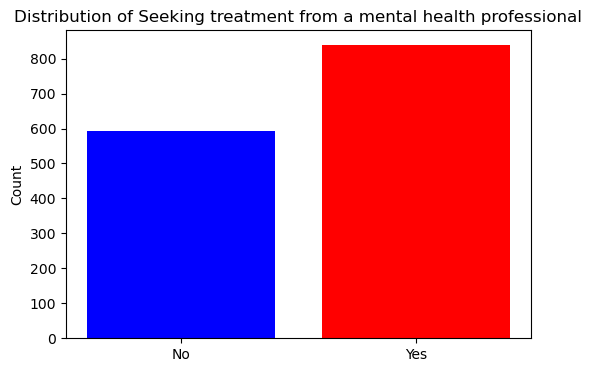

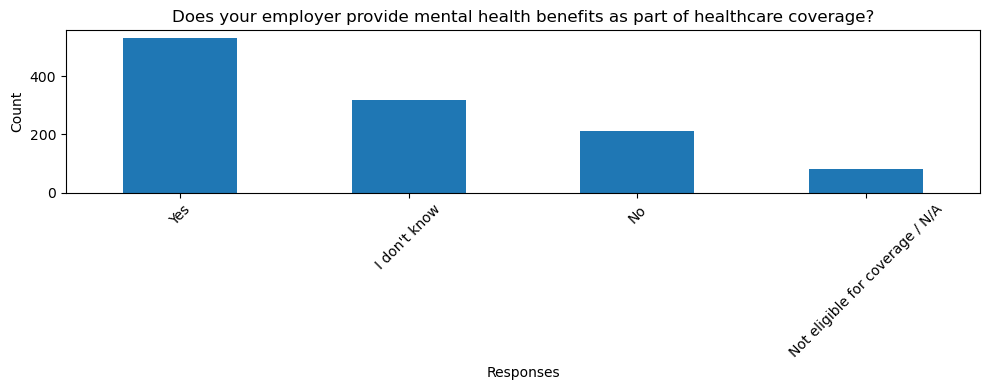

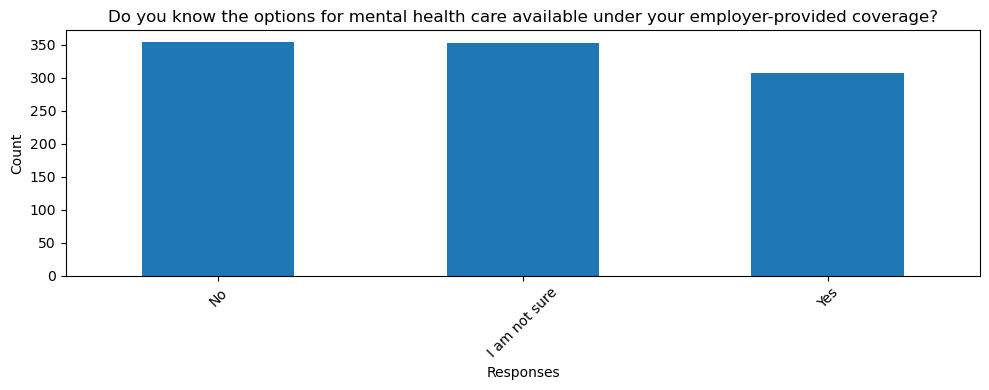

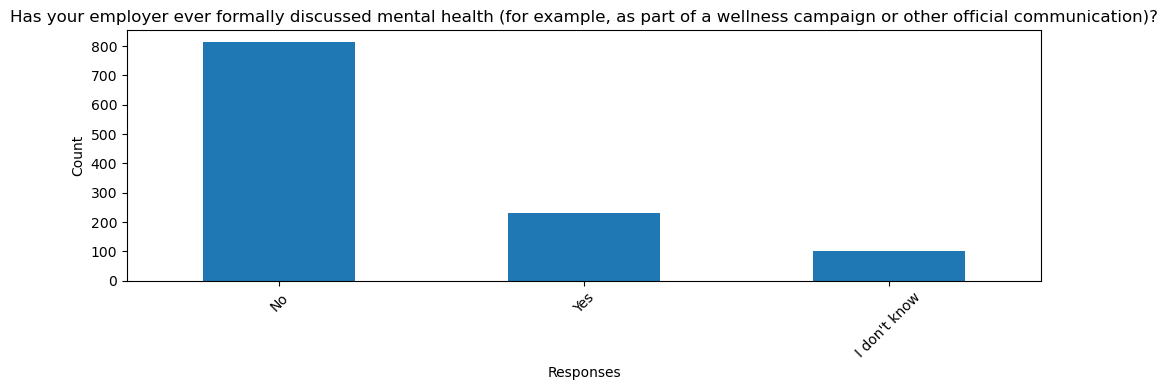

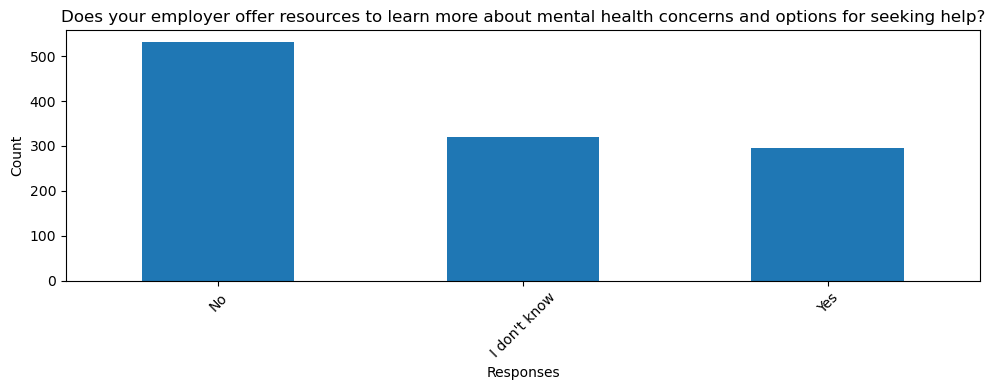

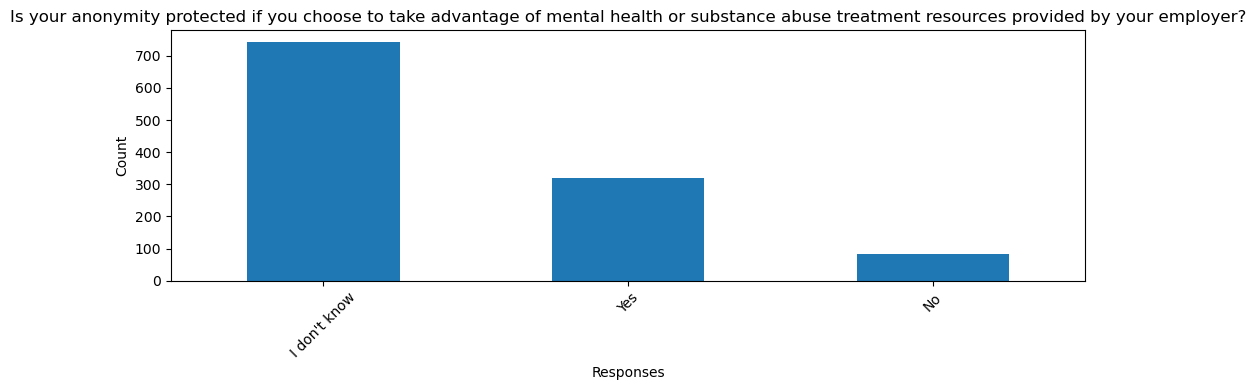

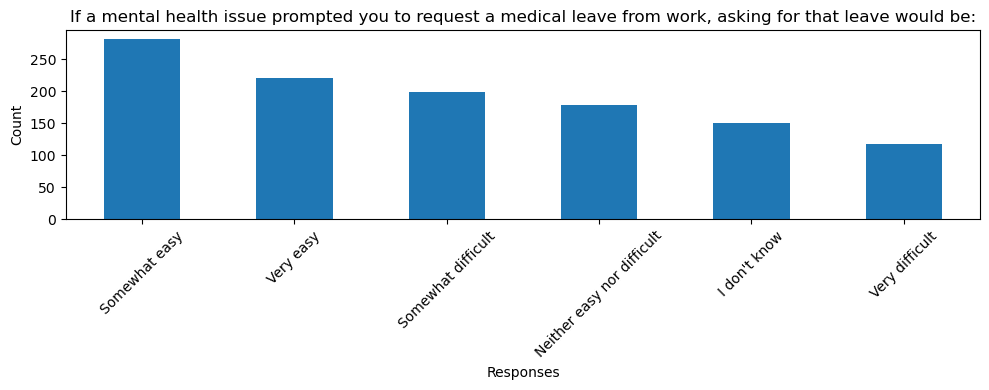

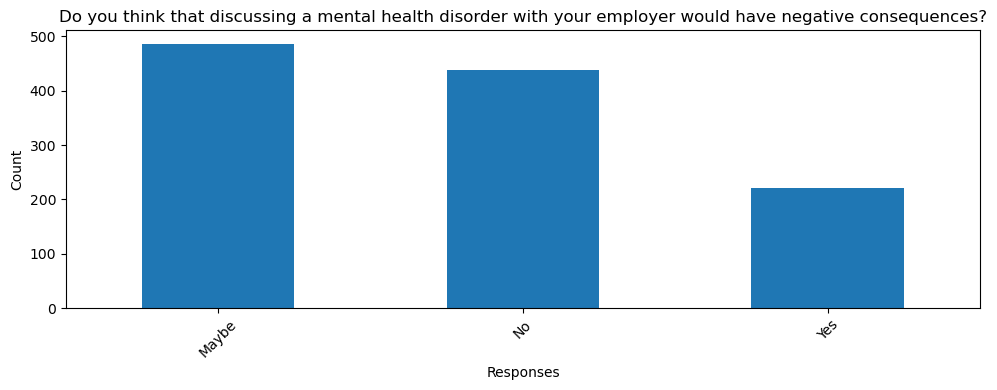

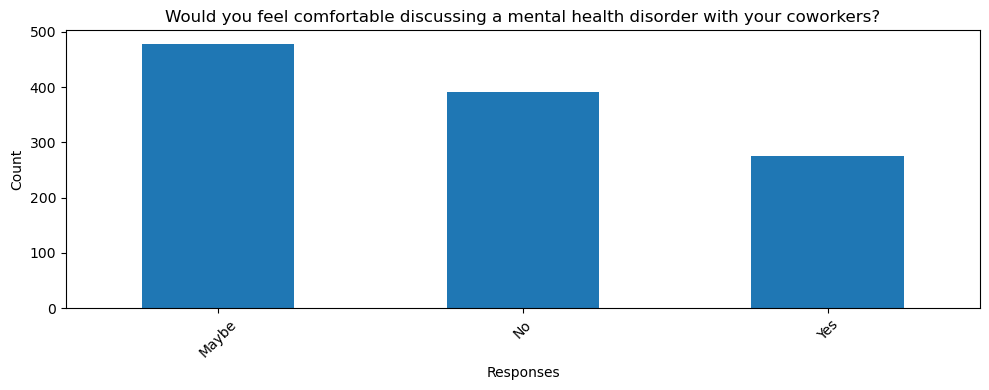

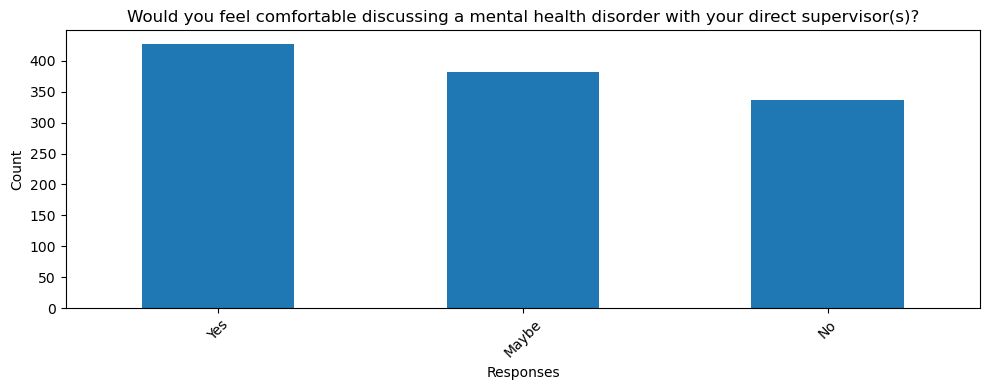

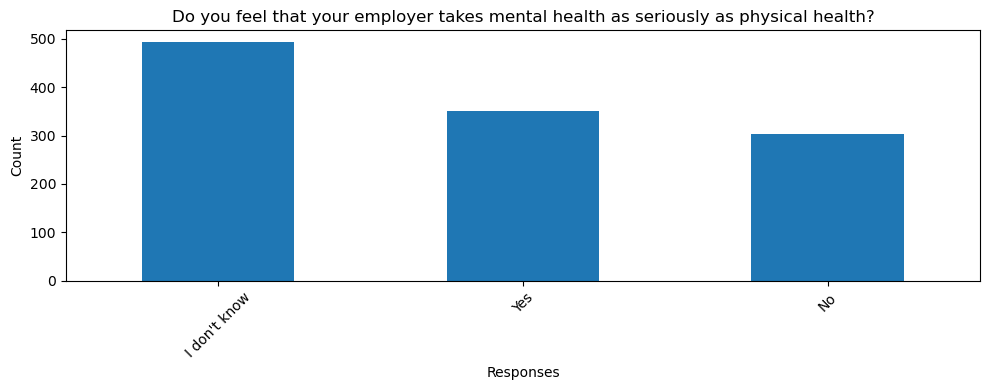

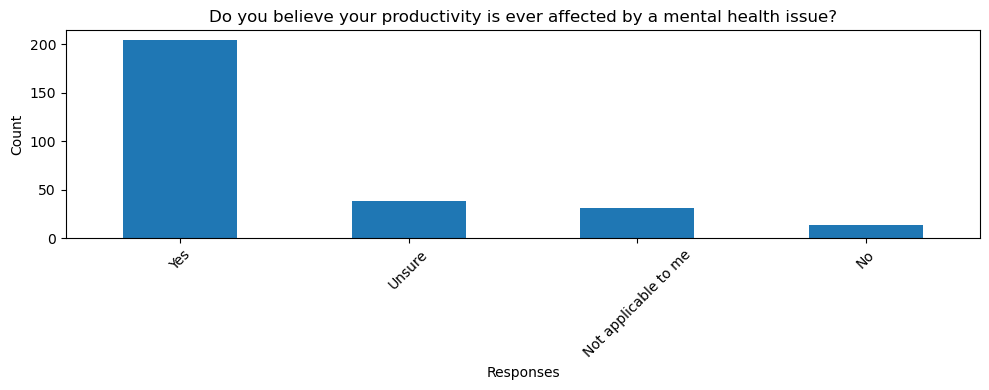

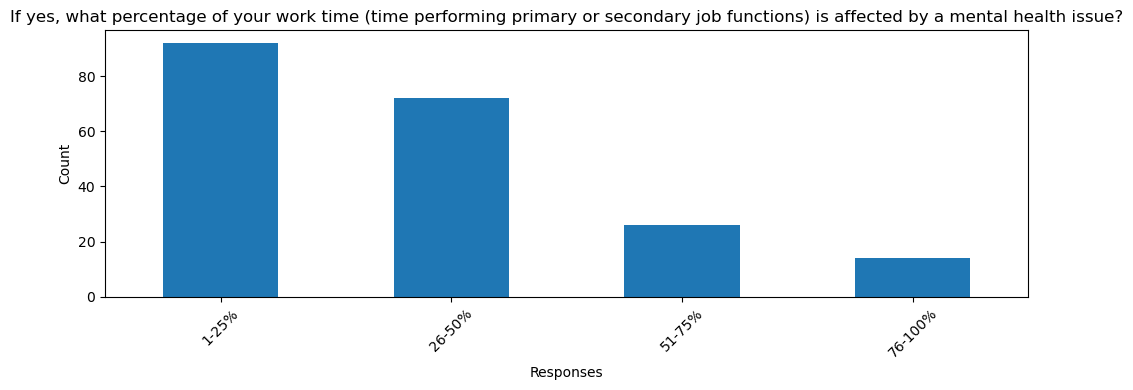

In [28]:

import pandas as pd 
import matplotlib
from matplotlib import pylab as plt

file = pd.read_csv(r"C:\Users\isade\OneDrive\Desktop\data1030\data1030-fall2025\project\data\mental-heath-in-tech-2016_20161114.csv")

# drop the free response section - not useful for a machine learning algorithm
dropped_columns= ['Why or why not?', 'Why or why not?.1' ]
df = file.drop(dropped_columns, axis =1)


# prepare the feature matrix X
feature_matrix = df.drop(columns = "Have you ever sought treatment for a mental health issue from a mental health professional?")

# prepare the target variable y
target_variable = df["Have you ever sought treatment for a mental health issue from a mental health professional?"]


#Q1 
print("Number of rows:", len(df))
print("Numer of columns:",len(df.columns))

#Q2
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)
print(df.dtypes)

#Q3
#print(dropped_file['two_year_recid'].describe())

#continuous = ["age", "juv_fel_count", "juv_misd_count", "juv_other_count", 
#                    "priors_count", "r_days_from_arrest", "c_jail_days", 
#                    "custody_days"]
# ordinal = ["age_cat"] 

# categorical_= ["sex", "race", "c_charge_degree"]

#visualizing target variable 
counts = df['Have you ever sought treatment for a mental health issue from a mental health professional?'].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values, color=["blue", "red"])
plt.xticks([0, 1], ["No", "Yes"])
plt.ylabel("Count")
plt.title("Distribution of Seeking treatment from a mental health professional")
plt.show()

#Does your employer provide mental health benefits as part of healthcare coverage?
df["Does your employer provide mental health benefits as part of healthcare coverage?"].value_counts().plot(kind="bar", figsize=(10,4))
plt.ylabel("Count")
plt.xlabel("Responses")
plt.xticks(rotation=45)
plt.title("Does your employer provide mental health benefits as part of healthcare coverage?")
plt.tight_layout()
plt.show()

# Do you know the options for mental health care available under your employer-provided coverage?
df["Do you know the options for mental health care available under your employer-provided coverage?"].value_counts().plot(kind="bar", figsize=(10,4))
plt.ylabel("Count")
plt.xlabel("Responses")
plt.xticks(rotation=45)
plt.title("Do you know the options for mental health care available under your employer-provided coverage?")
plt.tight_layout()
plt.show()

# Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
df["Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?"].value_counts().plot(kind="bar", figsize=(10,4))
plt.ylabel("Count")
plt.xlabel("Responses")
plt.xticks(rotation=45)
plt.title("Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?")
plt.tight_layout()
plt.show()

# Does your employer offer resources to learn more about mental health concerns and options for seeking help?
df["Does your employer offer resources to learn more about mental health concerns and options for seeking help?"].value_counts().plot(kind="bar", figsize=(10,4))
plt.ylabel("Count")
plt.xlabel("Responses")
plt.xticks(rotation=45)
plt.title("Does your employer offer resources to learn more about mental health concerns and options for seeking help?")
plt.tight_layout()
plt.show()

# Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
df["Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?"].value_counts().plot(kind="bar", figsize=(10,4))
plt.ylabel("Count")
plt.xlabel("Responses")
plt.xticks(rotation=45)
plt.title("Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?")
plt.tight_layout()
plt.show()

# If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
df["If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:"].value_counts().plot(kind="bar", figsize=(10,4))
plt.ylabel("Count")
plt.xlabel("Responses")
plt.xticks(rotation=45)
plt.title("If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:")
plt.tight_layout()
plt.show()

# Do you think that discussing a mental health disorder with your employer would have negative consequences?
df["Do you think that discussing a mental health disorder with your employer would have negative consequences?"].value_counts().plot(kind="bar", figsize=(10,4))
plt.ylabel("Count")
plt.xlabel("Responses")
plt.xticks(rotation=45)
plt.title("Do you think that discussing a mental health disorder with your employer would have negative consequences?")
plt.tight_layout()
plt.show()

# Would you feel comfortable discussing a mental health disorder with your coworkers?
df["Would you feel comfortable discussing a mental health disorder with your coworkers?"].value_counts().plot(kind="bar", figsize=(10,4))
plt.ylabel("Count")
plt.xlabel("Responses")
plt.xticks(rotation=45)
plt.title("Would you feel comfortable discussing a mental health disorder with your coworkers?")
plt.tight_layout()
plt.show()

# Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?
df["Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?"].value_counts().plot(kind="bar", figsize=(10,4))
plt.ylabel("Count")
plt.xlabel("Responses")
plt.xticks(rotation=45)
plt.title("Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?")
plt.tight_layout()
plt.show()

# Do you feel that your employer takes mental health as seriously as physical health?
df["Do you feel that your employer takes mental health as seriously as physical health?"].value_counts().plot(kind="bar", figsize=(10,4))
plt.ylabel("Count")
plt.xlabel("Responses")
plt.xticks(rotation=45)
plt.title("Do you feel that your employer takes mental health as seriously as physical health?")
plt.tight_layout()
plt.show()

# Do you believe your productivity is ever affected by a mental health issue?
df["Do you believe your productivity is ever affected by a mental health issue?"].value_counts().plot(kind="bar", figsize=(10,4))
plt.ylabel("Count")
plt.xlabel("Responses")
plt.xticks(rotation=45)
plt.title("Do you believe your productivity is ever affected by a mental health issue?")
plt.tight_layout()
plt.show()

# If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?
df["If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?"].value_counts().plot(kind="bar", figsize=(10,4))
plt.ylabel("Count")
plt.xlabel("Responses")
plt.xticks(rotation=45)
plt.title("If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?")
plt.tight_layout()
plt.show()
